In [ ]:
!pip install mmh3

  Created wheel for mmh3: filename=mmh3-2.5.1-cp36-cp36m-linux_x86_64.whl size=37854 sha256=012896b81d32f0b4c141ae45fac1f7a536cb7b2938e184e2975ff8ef1657a84b
  Stored in directory: /root/.cache/pip/wheels/38/b4/ea/6e4e321c625d3320c0c496bf4088371546d8fce5f1dd71b219
Successfully built mmh3


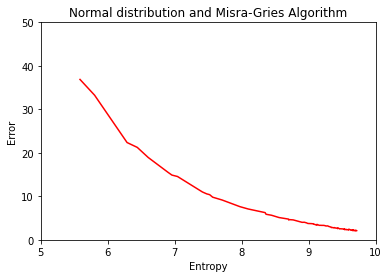

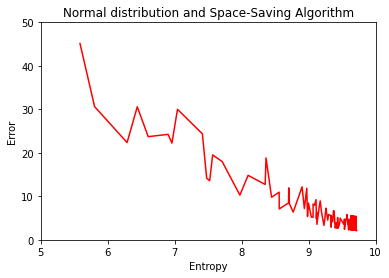

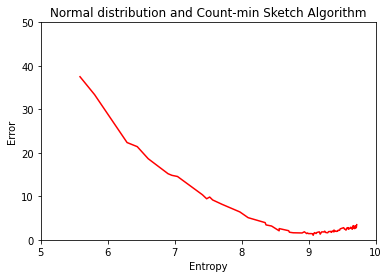

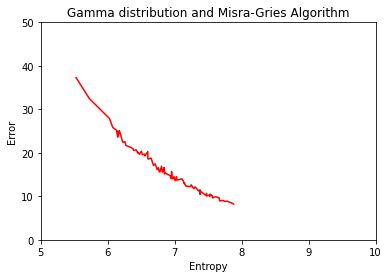

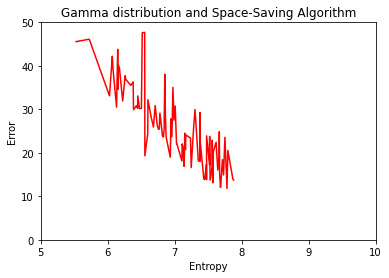

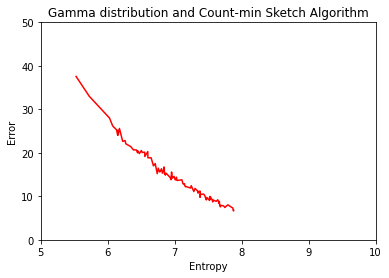

In [ ]:
import numpy as np
from collections import Counter
import mmh3
import matplotlib.pyplot as plt

num_counters = 10

class misra_gries(object):
    def __init__(self, stream):
        self.k = num_counters
        self.counters = Counter()
        for item in stream:
            if item in self.counters or len(self.counters) < self.k:
                self.counters[item] += 1

            else:
                for key in list(self.counters.keys()):
                    self.counters[key] -= 1
                    if self.counters[key] == 0:
                        del self.counters[key]
    
    def estimate(self, search):
        return self.counters[search]

    def type(self):
        return "Misra-Gries"


class space_saving(object):
    def __init__(self, stream):
        self.k = num_counters
        self.counters = Counter()
        for item in stream:
            if item in self.counters or len(self.counters) < self.k:
                self.counters[item] += 1
            else:
                min_key = min(self.counters, key = self.counters.get)
                self.counters[min_key] += 1
                self.counters[item] = self.counters.pop(min_key)
        
    def estimate(self, search):
        return self.counters[search]

    def type(self):
        return "Space-Saving"


class count(object):
    def __init__(self, stream):
        self.width = 100
        self.depth = 10
        self.table = np.zeros([self.depth, self.width])
        self.seed = np.random.randint(self.width, size = self.depth)
        self.n = len(stream)
        for item in stream:
            self.increment(str(item))

    def increment(self, key):
        for i in range(0, self.depth):
            index = mmh3.hash(key, self.seed[i]) % self.width
            self.table[i, index] = self.table[i, index]+1

    def estimate(self, key):
        min_est = self.n + 1
        for i in range(0, self.depth):
            index = mmh3.hash(key, self.seed[i]) % self.width
            if self.table[i, index] < min_est:
                min_est = self.table[i, index]
        return min_est

    def type(self):
        return "Count-min Sketch"


stream_length = 1000
class normal_distribution(object):
    def __init__(self, cnt = 100):
        self.count = cnt

    def dist(self):
        for _ in range(self.count):
            yield np.random.normal(0, np.random.uniform(8, 1000), stream_length).astype(int)

    def type(self):
        return "Normal"


class gamma_distribution(object):
    def __init__(self, cnt = 100):
        self.count = cnt

    def dist(self):
        for _ in range(self.count):
            yield np.random.gamma(np.random.uniform(4, 15), np.random.uniform(5, 20), stream_length).astype(int)

    def type(self):
        return "Gamma"


def plotGraphs(distribution, methods):
    plX = {}
    for distr in distribution:                        
        distObj = distr()
        disTy = distObj.type()

        plX[disTy] = {}

        for data in distObj.dist():            

            freq_orig = Counter(data)

            # Calculate Entropy of Data
            entr = np.array([item[1] for item in freq_orig.most_common()])
            entr = entr/np.sum(entr)
            entr = (-entr * np.log2(entr)).sum()
            
            for algo in methods:             

                # Create object
                algoObj = algo(data)
                algTy = algoObj.type()
                if algTy not in plX[disTy]:
                    plX[disTy][algTy] = []

                size = np.ceil(0.1 * len(freq_orig)).astype(int)

                # Calculate error of estimates
                totErr = 0
                for item in freq_orig.most_common(size):
                    estimate = algoObj.estimate(item[0])
                    totErr += np.abs(item[1] - estimate)
                totErr /= size

                # Append the data to the plot data
                plX[disTy][algTy].append((entr, totErr))


    for dist in plX:
        for algo in plX[dist]:
            plX[dist][algo].sort()
            plt.plot([it[0] for it in plX[dist][algo]], [it[1] for it in plX[dist][algo]], color = "red")
            plt.xlabel("Entropy")
            plt.ylabel("Error")
            plt.title("{} distribution and {} Algorithm".format(dist, algo))
            plt.xlim([5, 10])
            plt.ylim([0, 50])
            plt.show()


if __name__ == "__main__":

    distribution = [normal_distribution, gamma_distribution]
    method = [misra_gries, space_saving, count]
    plotGraphs(distribution, method)

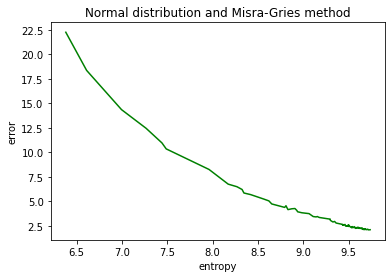

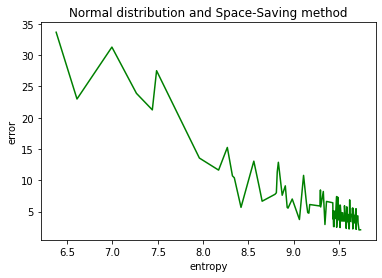

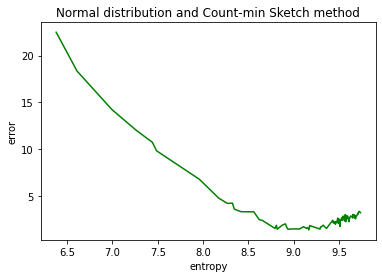

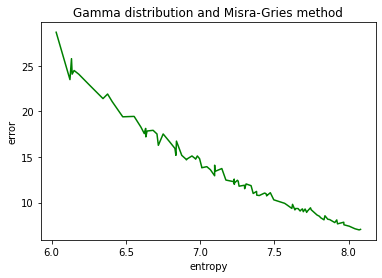

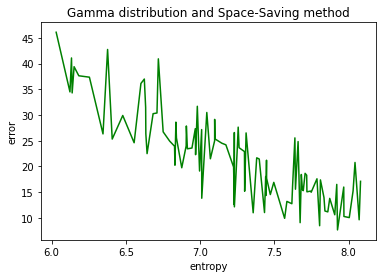

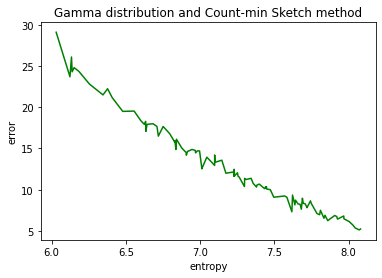

In [ ]:
import numpy as np
from collections import Counter
import mmh3
import matplotlib.pyplot as plt

num_counters = 10

class misra_gries(object):
    def __init__(self, stream):
        self.k = num_counters
        self.counters = Counter()
        for item in stream:
            if item in self.counters or len(self.counters) < self.k:
                self.counters[item] += 1

            else:
                for key in list(self.counters.keys()):
                    self.counters[key] -= 1
                    if self.counters[key] == 0:
                        del self.counters[key]
    
    def estimate(self, search):
        return self.counters[search]

    def type(self):
        return "Misra-Gries"


class space_saving(object):
    def __init__(self, stream):
        self.k = num_counters
        self.counters = Counter()
        for item in stream:
            if item in self.counters or len(self.counters) < self.k:
                self.counters[item] += 1
            else:
                min_key = min(self.counters, key = self.counters.get)
                self.counters[min_key] += 1
                self.counters[item] = self.counters.pop(min_key)
        
    def estimate(self, search):
        return self.counters[search]

    def type(self):
        return "Space-Saving"


class count(object):
    def __init__(self, stream):
        self.width = 100
        self.depth = 10
        self.table = np.zeros([self.depth, self.width])
        self.seed = np.random.randint(self.width, size = self.depth)
        self.n = len(stream)
        for item in stream:
            self.increment(str(item))

    def increment(self, key):
        for i in range(0, self.depth):
            index = mmh3.hash(key, self.seed[i]) % self.width
            self.table[i, index] = self.table[i, index]+1

    def estimate(self, key):
        min_est = self.n + 1
        for i in range(0, self.depth):
            index = mmh3.hash(key, self.seed[i]) % self.width
            if self.table[i, index] < min_est:
                min_est = self.table[i, index]
        return min_est

    def type(self):
        return "Count-min Sketch"


stream_length = 1000
class normal_distribution(object):
    def __init__(self, cnt = 100):
        self.count = cnt

    def dist(self):
        for _ in range(self.count):
            yield np.random.normal(0, np.random.uniform(11, 1000), stream_length).astype(int)

    def type(self):
        return "Normal"


class gamma_distribution(object):
    def __init__(self, cnt = 100):
        self.count = cnt

    def dist(self):
        for _ in range(self.count):
            yield np.random.gamma(np.random.uniform(6, 20), np.random.uniform(6, 20), stream_length).astype(int)

    def type(self):
        return "Gamma"


def plotGraphs(distribution, methods):
    plX = {}
    for distr in distribution:                        
        distObj = distr()
        disTy = distObj.type()

        plX[disTy] = {}

        for data in distObj.dist():            

            freq_orig = Counter(data)

            # Calculate Entropy of Data
            entr = np.array([item[1] for item in freq_orig.most_common()])
            entr = entr/np.sum(entr)
            entr = (-entr * np.log2(entr)).sum()
            
            for algo in methods:             

                # Create object
                algoObj = algo(data)
                algTy = algoObj.type()
                if algTy not in plX[disTy]:
                    plX[disTy][algTy] = []

                size = np.ceil(0.1 * len(freq_orig)).astype(int)

                # Calculate error of estimates
                totErr = 0
                for item in freq_orig.most_common(size):
                    estimate = algoObj.estimate(item[0])
                    totErr += np.abs(item[1] - estimate)
                totErr /= size

                # Append the data to the plot data
                plX[disTy][algTy].append((entr, totErr))


    for dist in plX:
        for algo in plX[dist]:
            plX[dist][algo].sort()
            plt.plot([it[0] for it in plX[dist][algo]], [it[1] for it in plX[dist][algo]], color = "green")
            plt.xlabel("entropy")
            plt.ylabel("error")
            #plt.xlim([5, 10])
            plt.title("{} distribution and {} method".format(dist, algo))
            plt.show()


if __name__ == "__main__":

    distribution = [normal_distribution, gamma_distribution]
    method = [misra_gries, space_saving, count]
    plotGraphs(distribution, method)